# 2) Simulation Study of MLE
## a) 1-time simulation and MLE for n=100

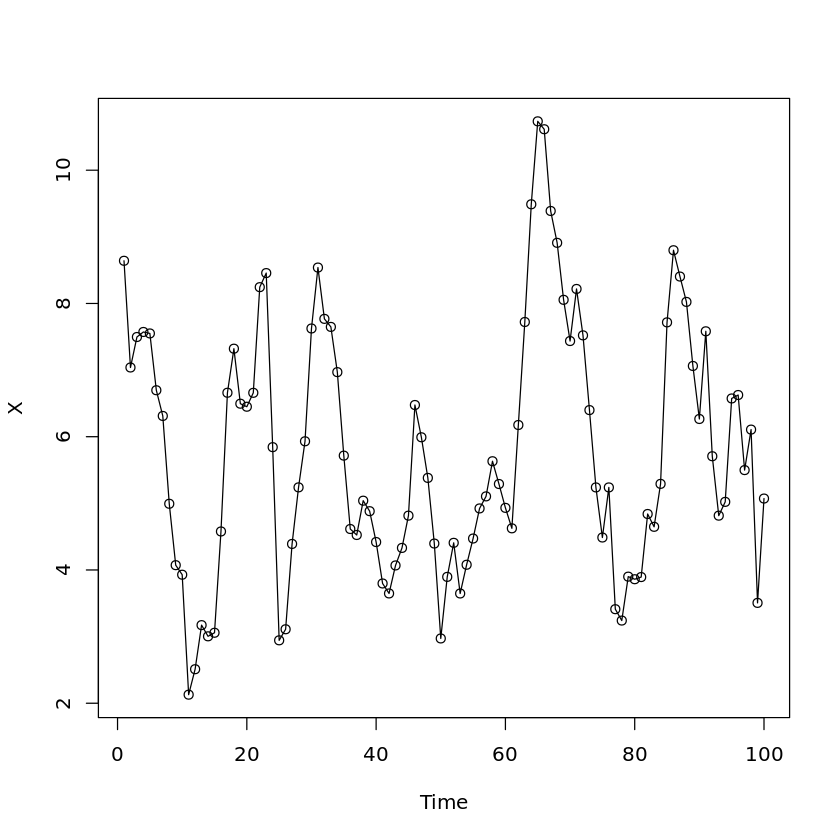

In [1]:
mu <- 5
X <- arima.sim(n=100, list(ar = c(0.7), ma = c(0.4))) + mu
plot(X, type="o")

In [2]:
Fit1 <- arima(X, order=c(1,0,1))
Fit1


Call:
arima(x = X, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.7478  0.4101     5.8906
s.e.  0.0768  0.1171     0.5120

sigma^2 estimated as 0.8879:  log likelihood = -136.72,  aic = 281.44

In [3]:
str(Fit1)

List of 14
 $ coef     : Named num [1:3] 0.748 0.41 5.891
  ..- attr(*, "names")= chr [1:3] "ar1" "ma1" "intercept"
 $ sigma2   : num 0.888
 $ var.coef : num [1:3, 1:3] 0.00589 -0.00445 0.00239 -0.00445 0.01371 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "ar1" "ma1" "intercept"
  .. ..$ : chr [1:3] "ar1" "ma1" "intercept"
 $ mask     : logi [1:3] TRUE TRUE TRUE
 $ loglik   : num -137
 $ aic      : num 281
 $ arma     : int [1:7] 1 1 0 0 1 0 0
 $ residuals: Time-Series [1:100] from 1 to 100: 1.36775 -1.11845 1.16827 0.00595 0.3994 ...
 $ call     : language arima(x = X, order = c(1, 0, 1))
 $ series   : chr "X"
 $ code     : int 0
 $ n.cond   : int 0
 $ nobs     : int 100
 $ model    :List of 10
  ..$ phi  : num 0.748
  ..$ theta: num 0.41
  ..$ Delta: num(0) 
  ..$ Z    : num [1:2] 1 0
  ..$ a    : num [1:2] -0.818 0.882
  ..$ P    : num [1:2, 1:2] 0 0 0 0
  ..$ T    : num [1:2, 1:2] 0.748 0 1 0
  ..$ V    : num [1:2, 1:2] 1 0.41 0.41 0.168
  ..$ h    : num 0
  ..$ Pn 

In [4]:
Fit1$coef

ar1       ma1 intercept 
0.7478374 0.4101033 5.8906293

In [5]:
Fit1$var.coef

,ar1,ma1,intercept
ar1,0.005893177,-0.0044542990,0.0023893334
ma1,-0.004454299,0.0137106235,0.0003632657
intercept,0.002389333,0.0003632657,0.2620991712


In [7]:
c(Fit1$var.coef[1,1], Fit1$var.coef[2,2], Fit1$var.coef[3,3])

[1] 0.005893177 0.013710624 0.262099171

## b) Put above in a loop of 500

In [9]:
n = 100
itt = 500

MLE <- matrix(0,itt, 7)
Vars <- matrix(0, itt, 7)

set.seed(1373)
for (i in 1:itt) {
    mu <- 5
    
    X <- arima.sim(n = n, list(ar = c(0.7, 0.2, -0.3), ma = c(0.6, -0.4, 0.2))) + mu
    
    Est <- arima(X, order=c(3,0,3))
    MLE[i, ] <- Est$coef
    Vars[i, ] <- diag(Est$var.coef)
}

Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, o

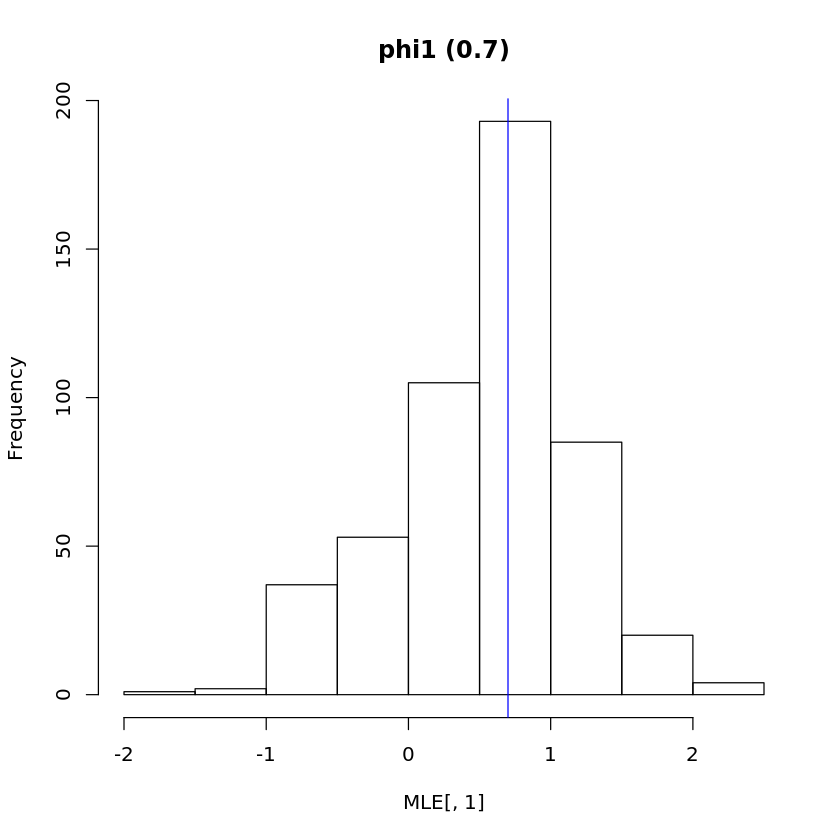

In [14]:
hist(MLE[,1], main="phi1 (0.7)")
abline(v = 0.7, col="blue")

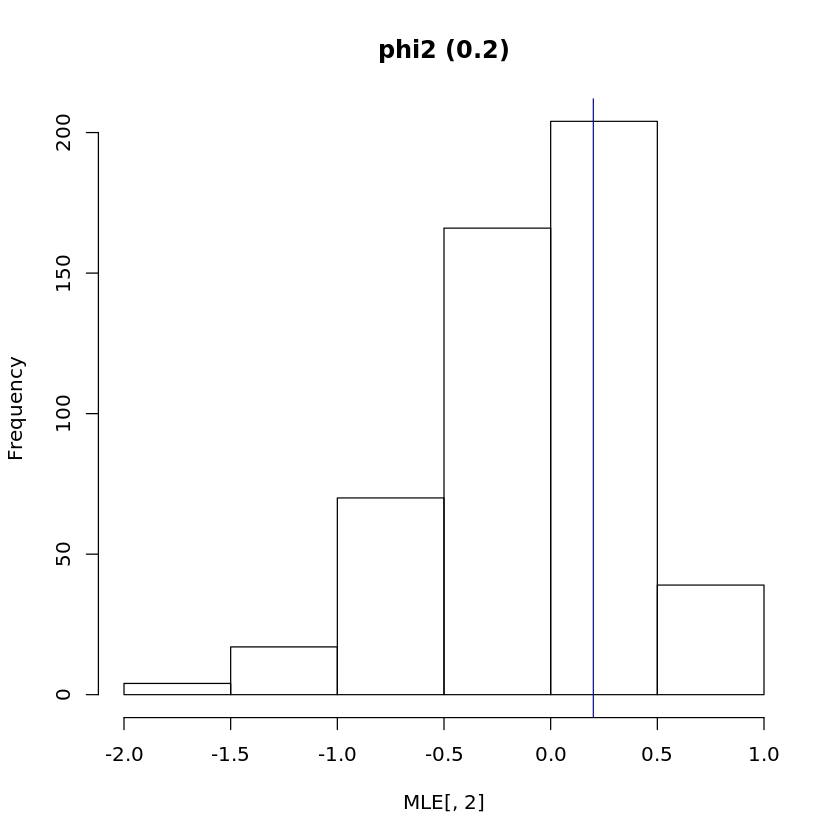

In [15]:
hist(MLE[,2], main="phi2 (0.2)")
abline(v = 0.2, col="blue")

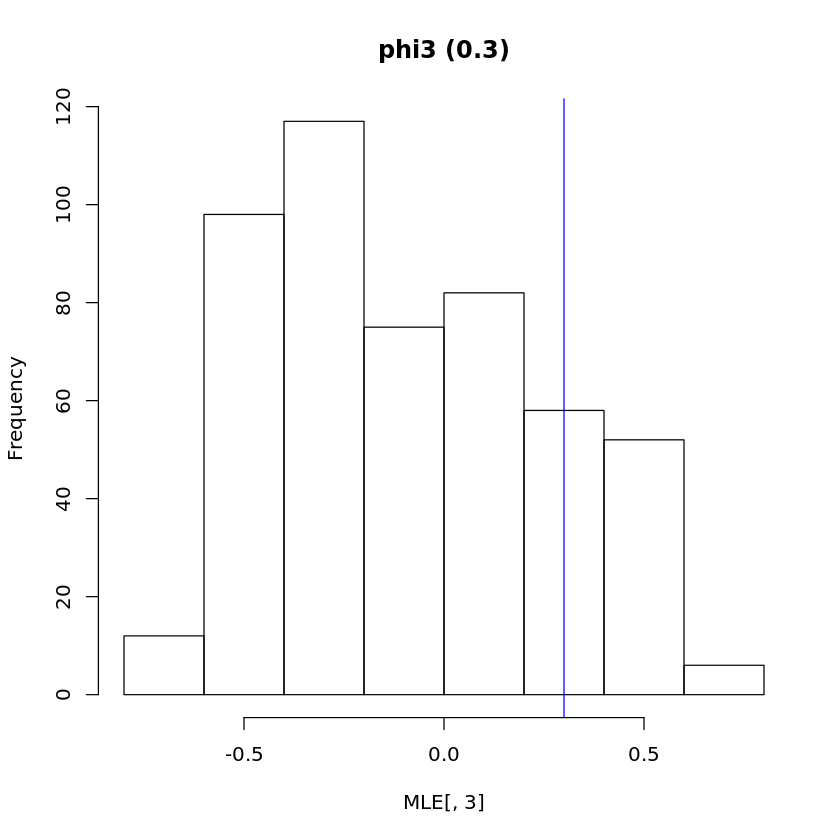

In [16]:
hist(MLE[,3], main="phi3 (0.3)")
abline(v = 0.3, col="blue")

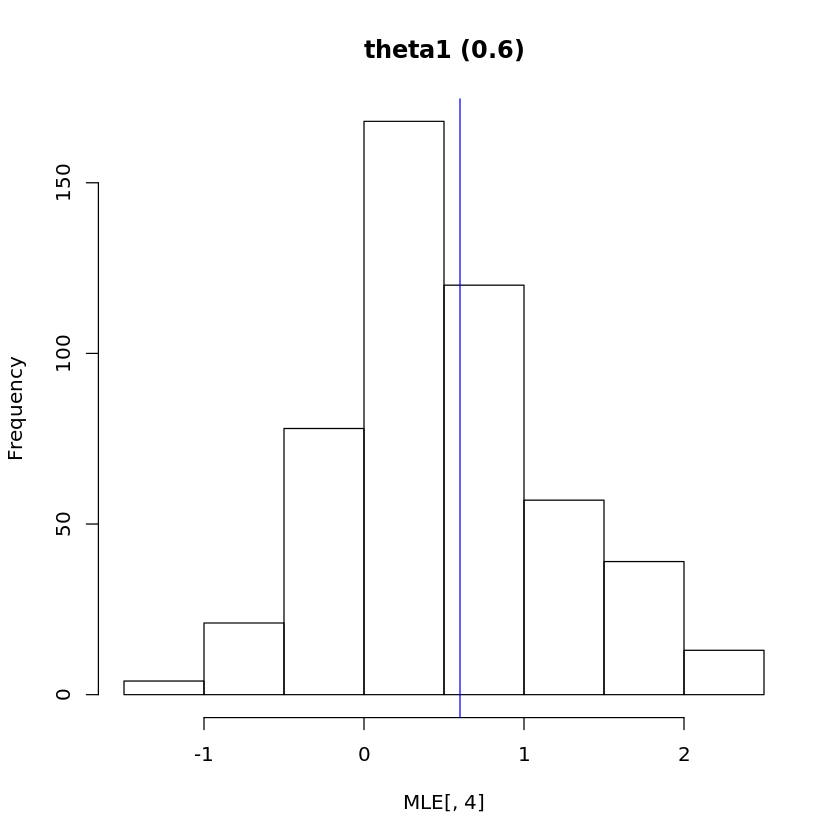

In [17]:
hist(MLE[,4], main="theta1 (0.6)")
abline(v = 0.6, col="blue")

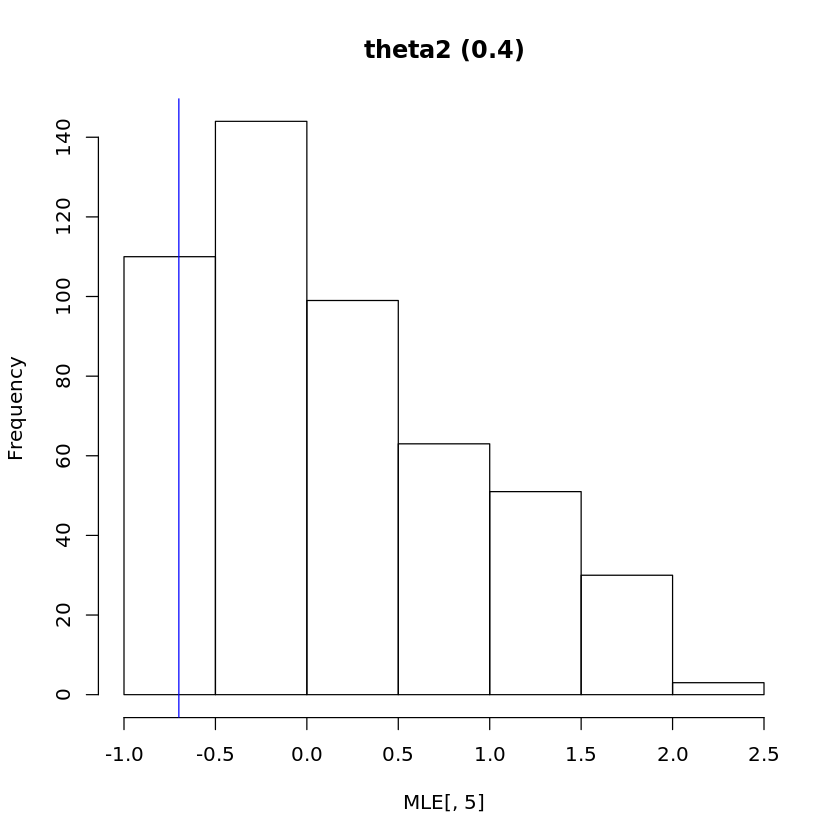

In [18]:
hist(MLE[,5], main="theta2 (0.4)")
abline(v = -0.7, col="blue")

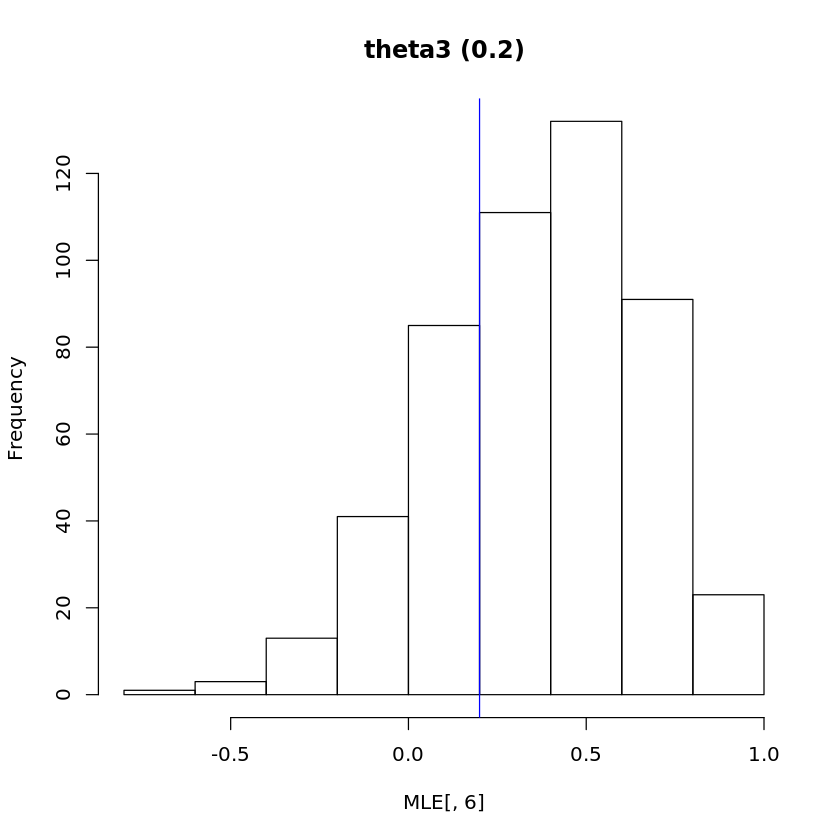

In [19]:
hist(MLE[,6], main="theta3 (0.2)")
abline(v = 0.2, col="blue")

In [20]:
Result <- cbind( apply(MLE, 2, mean), apply(MLE, 2, sd), sqrt(apply(Vars, 2, mean)) )

colnames(Result) <- c("Mean","SE by Sim",  "SE from Output")
Result

Mean,SE by Sim,SE from Output
0.54219901,0.6287555,0.3373931
-0.07737815,0.4732754,0.4208996
-0.08756192,0.3389433,0.2289118
0.53327228,0.6740080,0.3430469
0.15168870,0.7645230,0.3168747
0.36053869,0.2943564,0.2210431
4.99427214,0.3392900,0.3362771


### Increase n to 400

In [21]:
n = 400
itt = 500

MLE <- matrix(0,itt, 7)
Vars <- matrix(0, itt, 7)

set.seed(1373)
for (i in 1:itt) {
    mu <- 5
    
    X <- arima.sim(n = n, list(ar = c(0.7, 0.2, -0.3), ma = c(0.6, -0.4, 0.2))) + mu
    
    Est <- arima(X, order=c(3,0,3))
    MLE[i, ] <- Est$coef
    Vars[i, ] <- diag(Est$var.coef)
}

Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(X, order = c(3, 0, 3)):
“possible convergence problem: optim gave code = 1”


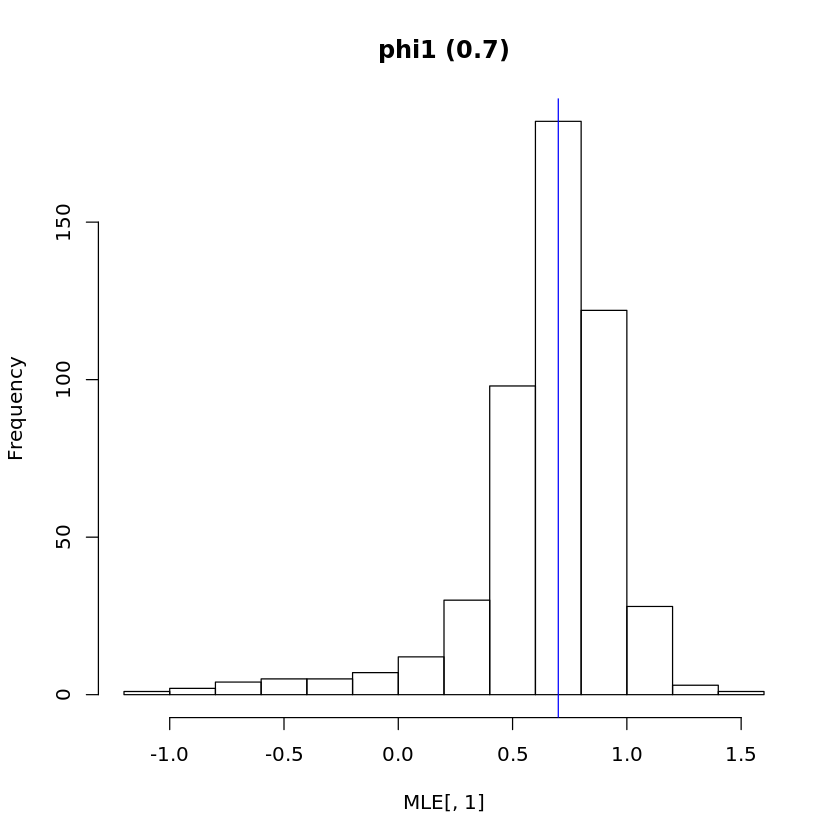

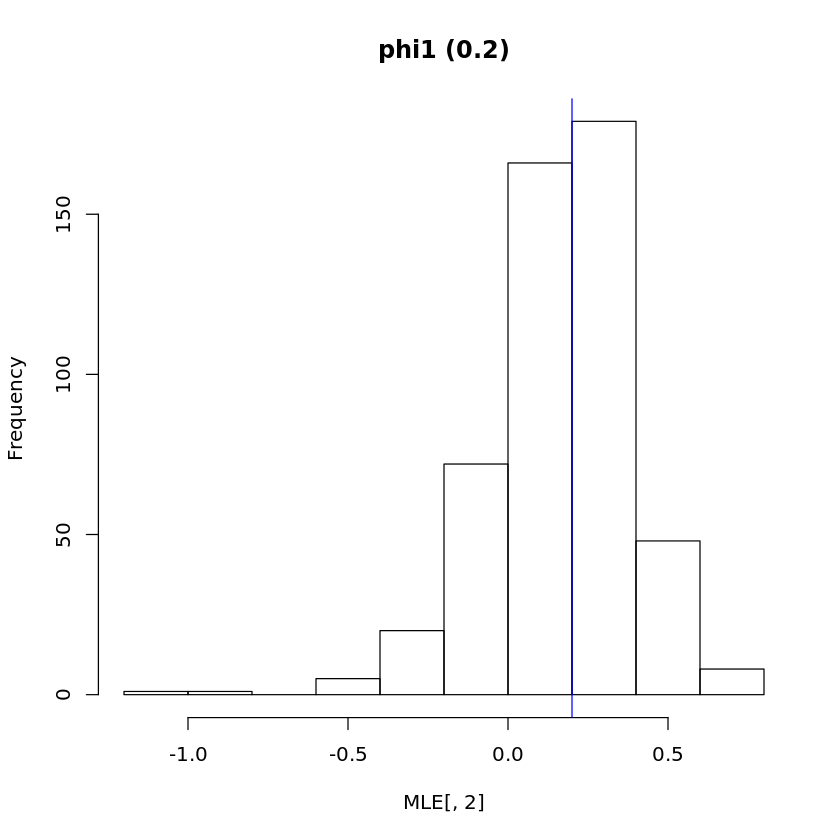

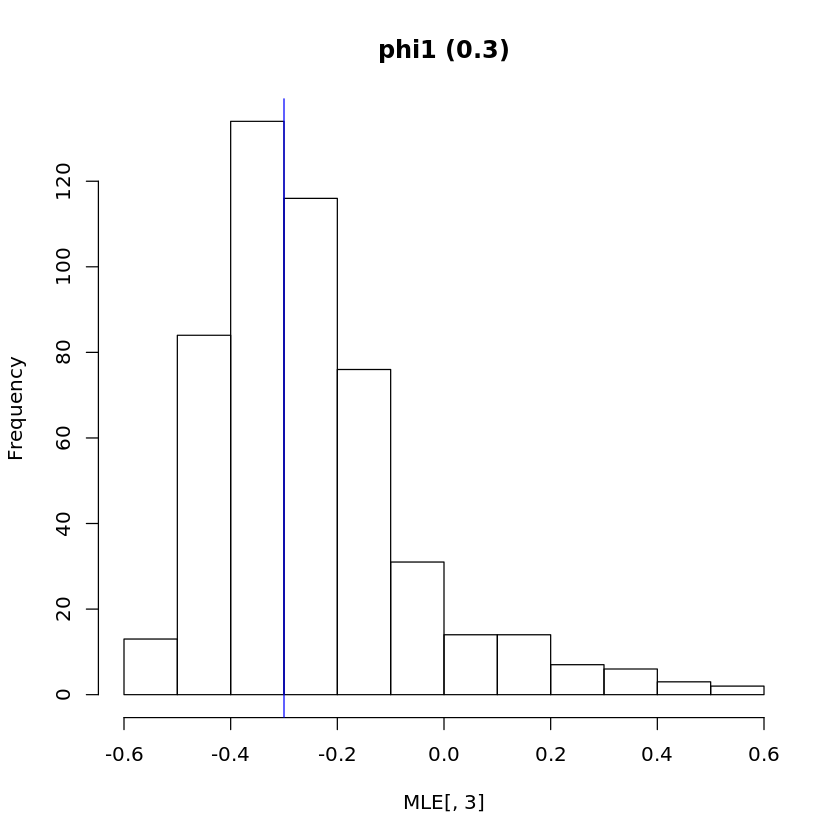

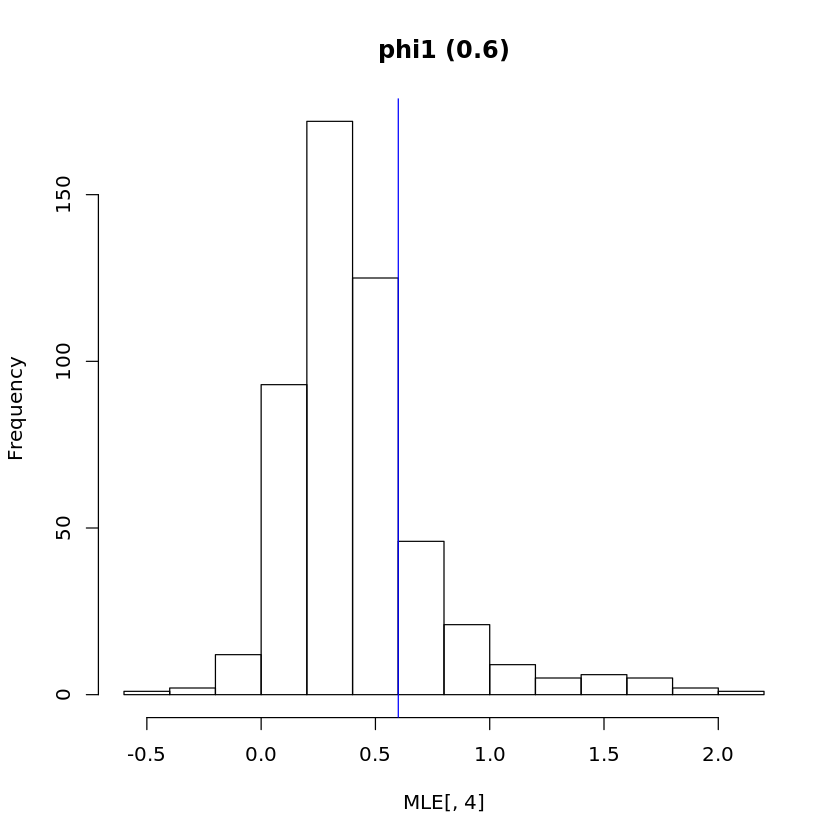

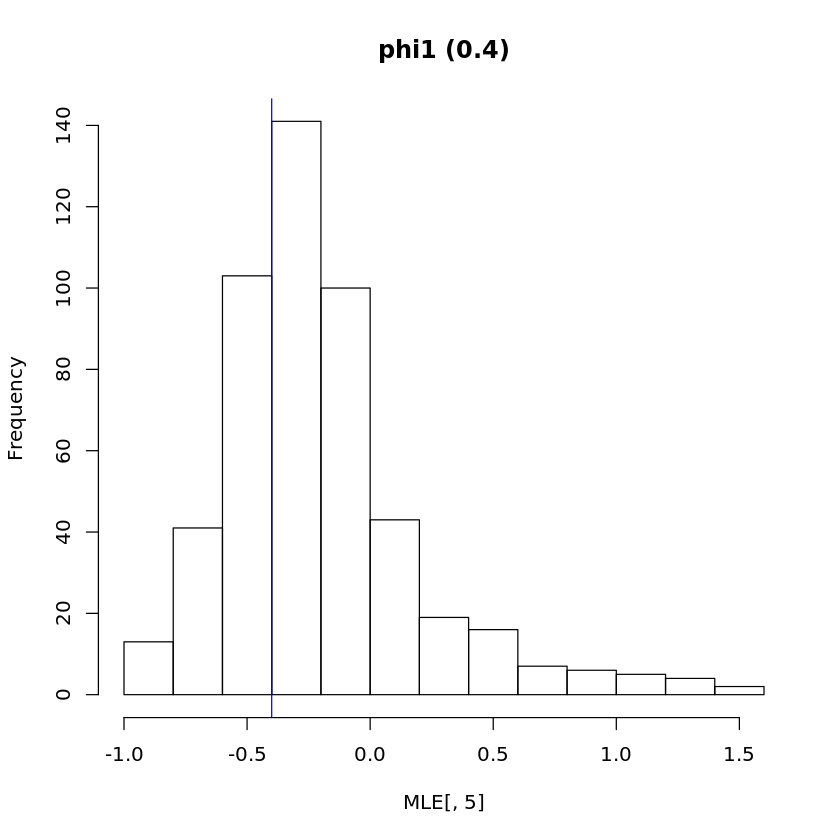

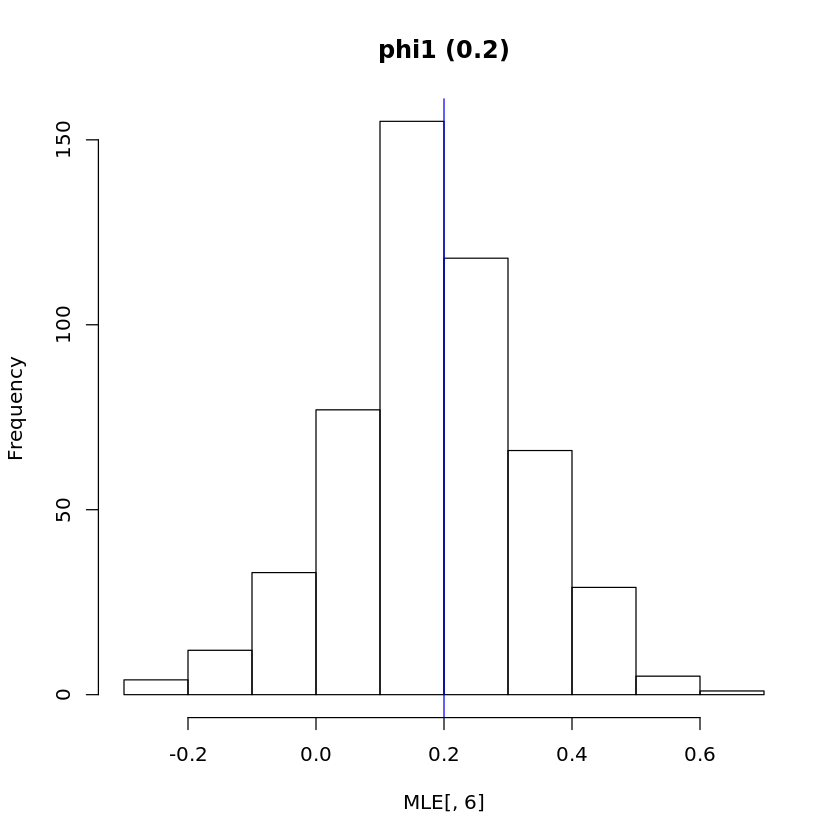

In [22]:
hist(MLE[,1], main="phi1 (0.7)")
abline(v = 0.7, col="blue")
hist(MLE[,2], main="phi1 (0.2)")
abline(v = 0.2, col="blue")
hist(MLE[,3], main="phi1 (0.3)")
abline(v = -0.3, col="blue")
hist(MLE[,4], main="phi1 (0.6)")
abline(v = 0.6, col="blue")
hist(MLE[,5], main="phi1 (0.4)")
abline(v = -0.4, col="blue")
hist(MLE[,6], main="phi1 (0.2)")
abline(v = 0.2, col="blue")

In [23]:
Result2 <- cbind( apply(MLE, 2, mean), apply(MLE, 2, sd), sqrt(apply(Vars, 2, mean)) )

colnames(Result) <- c("Mean","SE by Sim",  "SE from Output")
Result2

0.6502173,0.3250421,0.2316016
0.1589026,0.2235395,0.1942035
-0.2498664,0.1870695,0.1317936
0.4224474,0.3332988,0.2338230
-0.2008667,0.3952087,0.2789600
0.1860519,0.1443105,0.1305335
4.9906938,0.1734945,0.1717877


In [24]:
Result

Mean,SE by Sim,SE from Output
0.54219901,0.6287555,0.3373931
-0.07737815,0.4732754,0.4208996
-0.08756192,0.3389433,0.2289118
0.53327228,0.6740080,0.3430469
0.15168870,0.7645230,0.3168747
0.36053869,0.2943564,0.2210431
4.99427214,0.3392900,0.3362771


In [25]:
Est


Call:
arima(x = X, order = c(3, 0, 3))

Coefficients:
         ar1     ar2      ar3     ma1      ma2     ma3  intercept
      0.7036  0.0753  -0.2221  0.2925  -0.2399  0.2189     4.9493
s.e.  0.3199  0.1997   0.1659  0.3213   0.3922  0.1352     0.1553

sigma^2 estimated as 1.174:  log likelihood = -600.43,  aic = 1216.86